In [113]:
# Global Tools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats as ss
import yfinance as yf

from cycler import cycler
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
from pandas_datareader import DataReader
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
from scipy.signal import find_peaks
from tqdm import tqdm


##### Global Settings

In [114]:
# display all outputs of a cell
# InteractiveShell.ast_node_interactivity = "all"

In [115]:
# global setting for plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150
plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = cycler(color=['#76B900', '#DC143C', '#002366', '#5A9BD5', '#A2AAAD', '#B03060'])


In [116]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbols = ['NVDA', 'AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
stocks= yf.download(stock_symbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


##### Stock Price Curve

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Stock Price History (Jan 2020 - Aug 2024)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Adjusted Close Price')

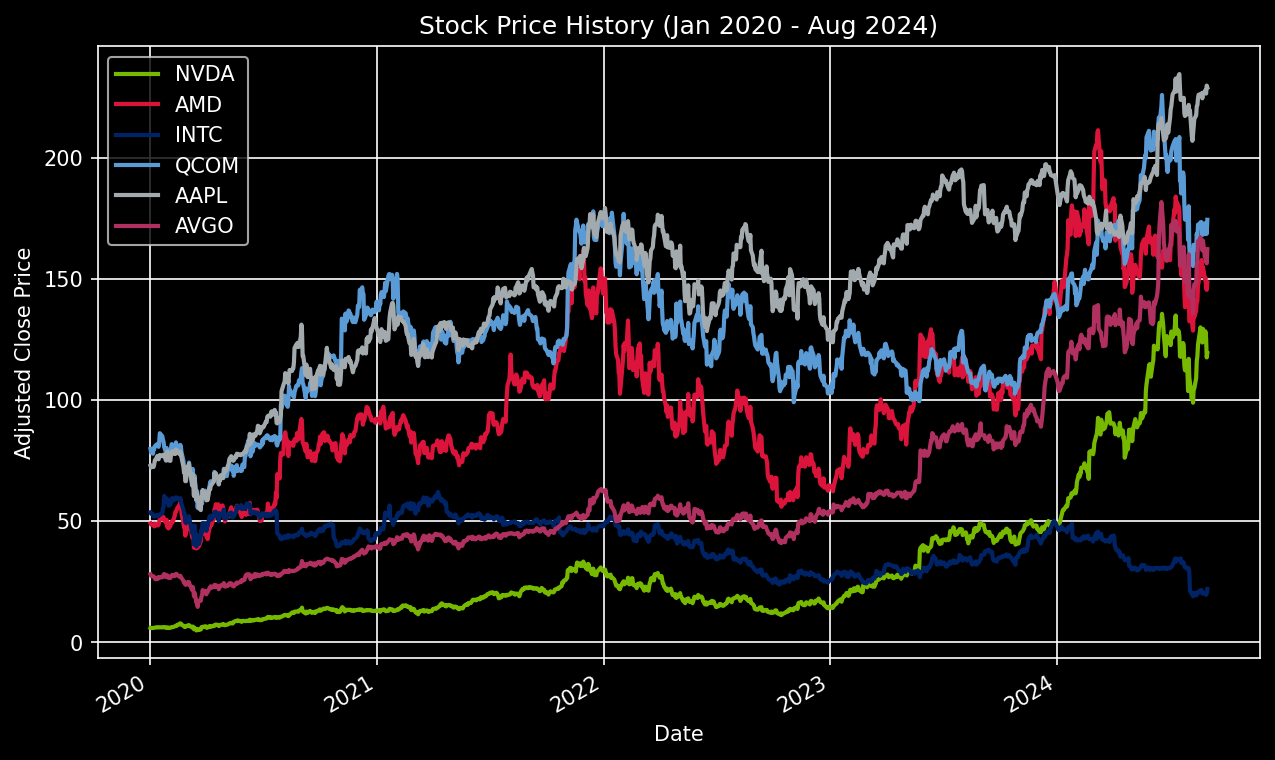

In [117]:
for ticker in stock_symbols:
    stocks[ticker].plot(label=ticker, linewidth=2)
plt.title("Stock Price History (Jan 2020 - Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

##### Means, Variance, Skewness, and Kurtosis

In [118]:
    
for ticker in stock_symbols:
    stock_prices = stocks[ticker]
    mean_price = stock_prices.mean()
    variance_price = stock_prices.var()
    skewness_price = ss.skew(stock_prices)
    kurtosis_price = ss.kurtosis(stock_prices)
    print(f"{ticker}:\n Mean: {mean_price}, Variance: {variance_price},\n Skewness: {skewness_price}, Kurtosis: {kurtosis_price}")


NVDA:
 Mean: 31.725554018248083, Variance: 879.408828342773,
 Skewness: 1.8799515486974654, Kurtosis: 2.771775072769536
AMD:
 Mean: 100.64815152442841, Variance: 1239.798089450361,
 Skewness: 0.6734634798536817, Kurtosis: -0.06924435787548067
INTC:
 Mean: 41.40178279129366, Variance: 97.54822064870584,
 Skewness: -0.16579815193248804, Kurtosis: -1.029516447540574
QCOM:
 Mean: 126.97301670964775, Variance: 936.266427262535,
 Skewness: 0.3084162603462922, Kurtosis: 0.4168100900142364
AAPL:
 Mean: 146.75708231690388, Variance: 1400.3759487445866,
 Skewness: -0.3384441604869188, Kurtosis: -0.15597196977460115
AVGO:
 Mean: 63.059623954649474, Variance: 1313.8634386583865,
 Skewness: 1.3369858419065073, Kurtosis: 0.9558666469314496


##### Kernel Density Estimation (KDE)

<Axes: xlabel='NVDA', ylabel='Density'>

<Axes: xlabel='NVDA', ylabel='Density'>

<Axes: xlabel='NVDA', ylabel='Density'>

<Axes: xlabel='NVDA', ylabel='Density'>

<Axes: xlabel='NVDA', ylabel='Density'>

<Axes: xlabel='NVDA', ylabel='Density'>

Text(0.5, 1.0, 'KDE of Adjusted Close Prices (Jan 2020 - Aug 2024)')

Text(0.5, 0, 'Adjusted Close Price')

Text(0, 0.5, 'Density')

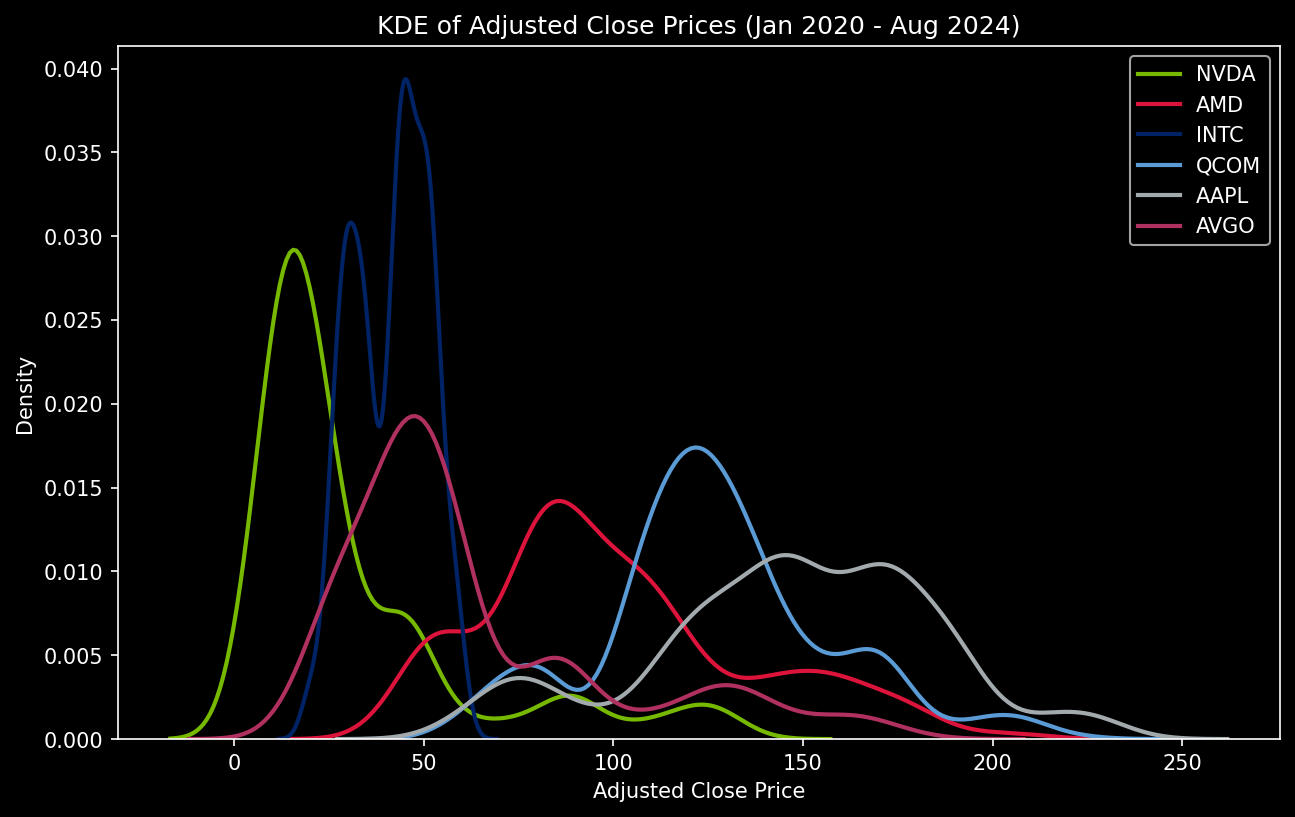

In [119]:
for ticker in stock_symbols:
    stock_prices = stocks[ticker].dropna()
    sns.kdeplot(stock_prices, label=f'{ticker}', linewidth=2)
plt.title("KDE of Adjusted Close Prices (Jan 2020 - Aug 2024)")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Density")
plt.legend()
plt.show()

##### Mixture Modeling

NVIDIA stock sample mean: $31.725554018248083
NVIDIA stock sample standard deviation: $29.642195562922154


(array([0.00015563, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00015563, 0.00015563, 0.00015563, 0.        ,
        0.00015563, 0.00031126, 0.00077816, 0.00046689, 0.00171195,
        0.00544711, 0.01151674, 0.01992085, 0.02801369, 0.02567922,
        0.01774201, 0.00684779, 0.00404642, 0.00186758, 0.00202321,
        0.00264574, 0.00140068, 0.00233447, 0.00186758, 0.00140068,
        0.00171195, 0.00202321, 0.00140068, 0.00155632, 0.00186758,
        0.00062253, 0.00140068, 0.00186758, 0.00124505, 0.00093379,
        0.00062253, 0.00108942, 0.00015563, 0.00046689, 0.00062253,
        0.        , 0.00031126, 0.00046689, 0.00031126, 0.00015563]),
 array([-103.9885691 ,  -97.56313992,  -91.13771074,  -84.71228155,
         -78.28685237,  -71.86142319,  -65.435994  ,  -59.01056482,
         -52.58513564,  -46.15970646,  -39.73427727,  -33.30884809,
         -26.88341891,  -20.45798973,  -14.03256054,   -7.60713136,
          -1.18170218,    5.24372701,   11.669

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Empirical vs Simulated Distribution for NVDA')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Density')

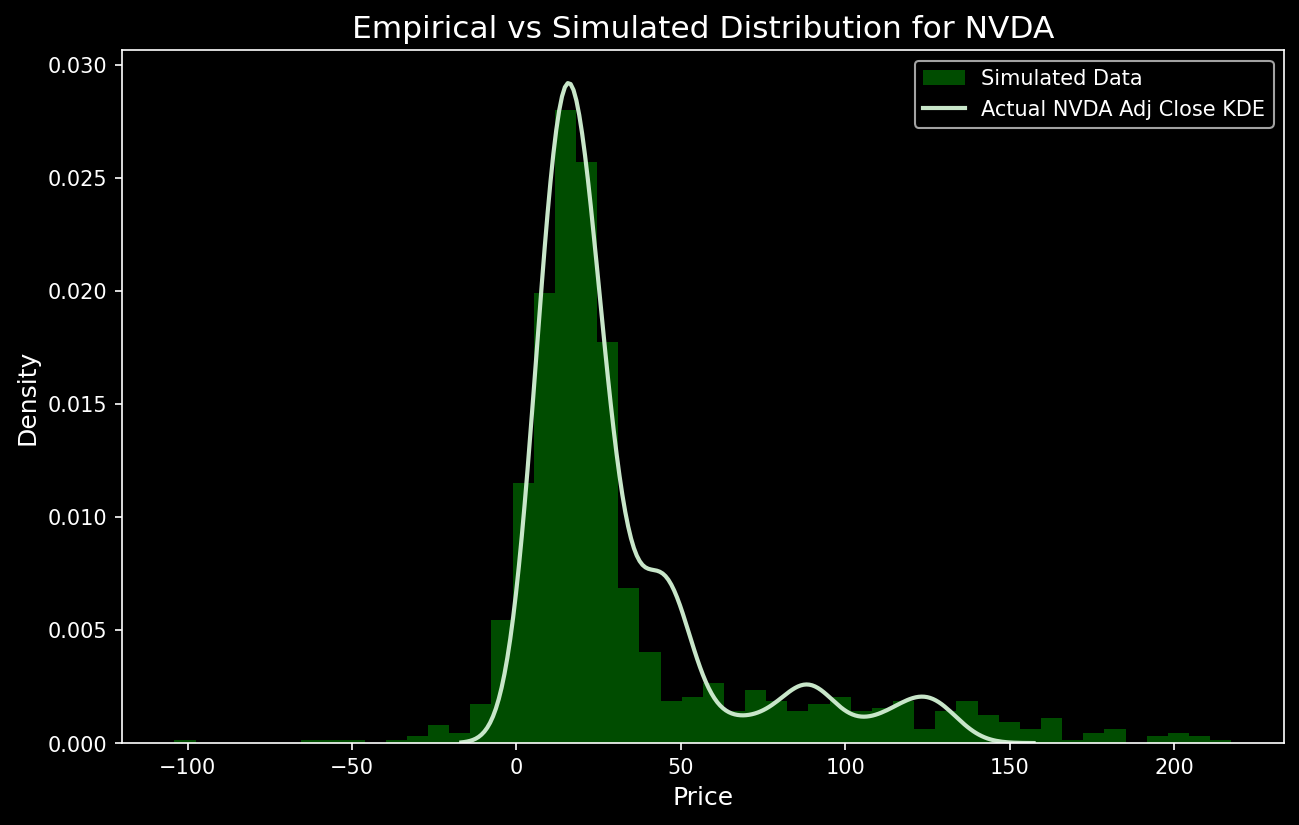

In [120]:
X = stocks['NVDA'].values
mu = np.mean(X)
se = np.std(X)
print(f"NVIDIA stock sample mean: ${mu}")
print(f"NVIDIA stock sample standard deviation: ${se}")

# Tuned parameters
mu_1 = 16  
sigma1 = 10
mu_2 = 80
sigma2 = 60
p = 0.7     
T = 1000

r = np.zeros(T)
for t in range(T):
    eps1 = np.random.normal(0, 1)
    eps2 = np.random.normal(0, 1)
    r1 = mu_1 + sigma1 * eps1 
    r2 = mu_2 + sigma2 * eps2  
    u = np.random.uniform(0, 1)
    r[t] = r1 * (u <= p) + r2 * (u > p)  
plt.hist(r, bins=50, density=True, alpha=0.6, color='green', label="Simulated Data")
sns.kdeplot(data=X, color='#C8E6C9', label='Actual NVDA Adj Close KDE', lw=2)
plt.title(f'Empirical vs Simulated Distribution for NVDA', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

##### Bootstrap

In [121]:
for symbol in stock_symbols:
     X = stocks[symbol].values
     # Bootstrap parameters
     T= X.shape[0]
     B = 1000 # 5000, 100000 [250 9750]
     # using round() instead of int() casting to reduce conversion error
     upper_bound = round(B * 0.975)
     lower_bound = round(B * 0.025)
     mu_boot = np.zeros(B)
     se_boot = np.zeros(B)
     x_boot_std = np.zeros(B)

    # Bootstrap
     for i in range(0, B):
          x_boot = X[np.random.choice(T,T)]
          mu_boot[i] = np.mean(x_boot)
          se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
          x_boot_std[i] = np.std(x_boot) # std of x_boot
          # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
     mu_boot = np.sort(mu_boot)
     se_boot = np.sort(se_boot)
     xboot_std = np.sort(x_boot_std)
    
     print(symbol)
     print("(",mu_boot[25],",", 
          mu_boot[975],")")
     print("(",se_boot[25],",",
          se_boot[975],")")
     print("(",se_boot[25]*np.sqrt(T),",",
          se_boot[975]*np.sqrt(T),")")
     print("(",xboot_std[25],",",
          xboot_std[975],")")

NVDA
( 29.927999500927772 , 33.37158686988805 )
( 0.8068455814477883 , 0.9138085292991888 )
( 27.645501553821305 , 31.310446134321005 )
( 27.645501553821305 , 31.310446134321005 )
AMD
( 98.61155879071055 , 102.6339095731407 )
( 0.9838443094752926 , 1.0643986323854404 )
( 33.710129932808606 , 36.47021774934407 )
( 33.710129932808606 , 36.47021774934407 )
INTC
( 40.82941892971578 , 41.96427947536644 )
( 0.27964816198901876 , 0.29554064481518555 )
( 9.581776085230965 , 10.126311085195272 )
( 9.581776085230965 , 10.12631108519527 )
QCOM
( 125.31454415459446 , 128.74022636868477 )
( 0.8535687692472813 , 0.9330207288883267 )
( 29.246410067929535 , 31.968726858422865 )
( 29.246410067929535 , 31.968726858422865 )
AAPL
( 144.6735373079472 , 148.99503015456452 )
( 1.0479996615459617 , 1.1324057298823342 )
( 35.90832860444675 , 38.800391406796166 )
( 35.90832860444675 , 38.800391406796166 )
AVGO
( 61.11439740475032 , 65.10754507444989 )
( 1.0051743605466898 , 1.1072556407752343 )
( 34.44097604958

### Monte-Carlo

In [122]:
def monte_carlo_simulation(mu_1, sigma1, 
                           mu_2, sigma2, 
                           p, T=1000):
    r = np.zeros(T)
    for t in range(T):
        eps1 = np.random.normal(0,1,1)
        eps2 = np.random.normal(0,1,1)
        r1 = mu_1 + sigma1 * eps1
        r2 = mu_2 + sigma2 * eps2
        u = np.random.uniform(0,1,1)
        r[t] = r1*(u <= p)+r2*(u > p)
    
    return r

def simulation_image(parameters, save_path):
    current_X, mu_1, sigma1, mu_2, sigma2, p =  parameters[0], parameters[1], parameters[2],parameters[3], parameters[4], parameters[5]
 
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots()
    sns.kdeplot(data=current_X, linewidth=4)
    initalR = monte_carlo_simulation(mu_1, sigma1, mu_2, sigma2, p, T=1000)
    plt.hist(initalR, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
    ax.legend([f'Empirical Kernal Distribution: {save_path}', 'Mixture Model Simulated Distribution'])
    plt.title(f'Monte Carlo Simulation\n,sigma1={sigma1},sigma2={sigma2}')
    ## Save Image
    imagePath = os.path.join(save_path,f"{save_path},sigma1={sigma1},sigma2={sigma2}'.png")
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    plt.savefig(imagePath)

def calculateOverlap(parameters):
    
    current_X, mu_1, sigma1, mu_2, sigma2, p =  parameters[0], parameters[1], parameters[2],parameters[3], parameters[4], parameters[5]
    r = monte_carlo_simulation(mu_1, sigma1, 
                               mu_2, sigma2, 
                          p)
    
    histArea, bin_edges = np.histogram(r, bins=100, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    
    kde = gaussian_kde(current_X)
    kdeArea = kde(bin_centers)
    
    overlap = np.minimum(histArea, kdeArea)
    return scipy.integrate.simps(overlap, bin_centers)

# Loop 

def optimize_parameters(parameters, save_path, step=5):
    bestArea = 0
    bestParam = []
    sigma1, sigma2 =  parameters[2], parameters[4]
    
    if sigma2>sigma1:
        sigma1_range = [i for i in range(sigma1-step, sigma1+step)]
        sigma2_range = [i for i in range(int(np.floor(sigma2-step*2)), sigma2+step*2)]
    
    else:
        sigma2_range = [i for i in range(sigma2-step, sigma2+step)]
        sigma1_range = [i for i in range(int(np.floor(sigma1-step*2)), sigma1+step*2)]
    
    for i in tqdm(sigma1_range):
        for j in sigma2_range:
            parameters[2] = i
            parameters[4] = j
            simulation_image(parameters, save_path)
            
            overlapArea = calculateOverlap(parameters)
            
            if bestArea <= overlapArea:
                bestParam = parameters
    return bestParam

##### Get mu_1, mu_2

<Figure size 1500x900 with 0 Axes>

Peaks corresponding x values: [ 15.59546726  88.15090248 123.11737729]
Valleys corresponding x values: [ 68.91934134 105.63413989]


C:\Users\56111\AppData\Local\Temp\ipykernel_188072\2851559226.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(peak_x_values, y[peaks], "ro", label='Peaks', color = '#FF6F91')


<Figure size 1500x900 with 0 Axes>

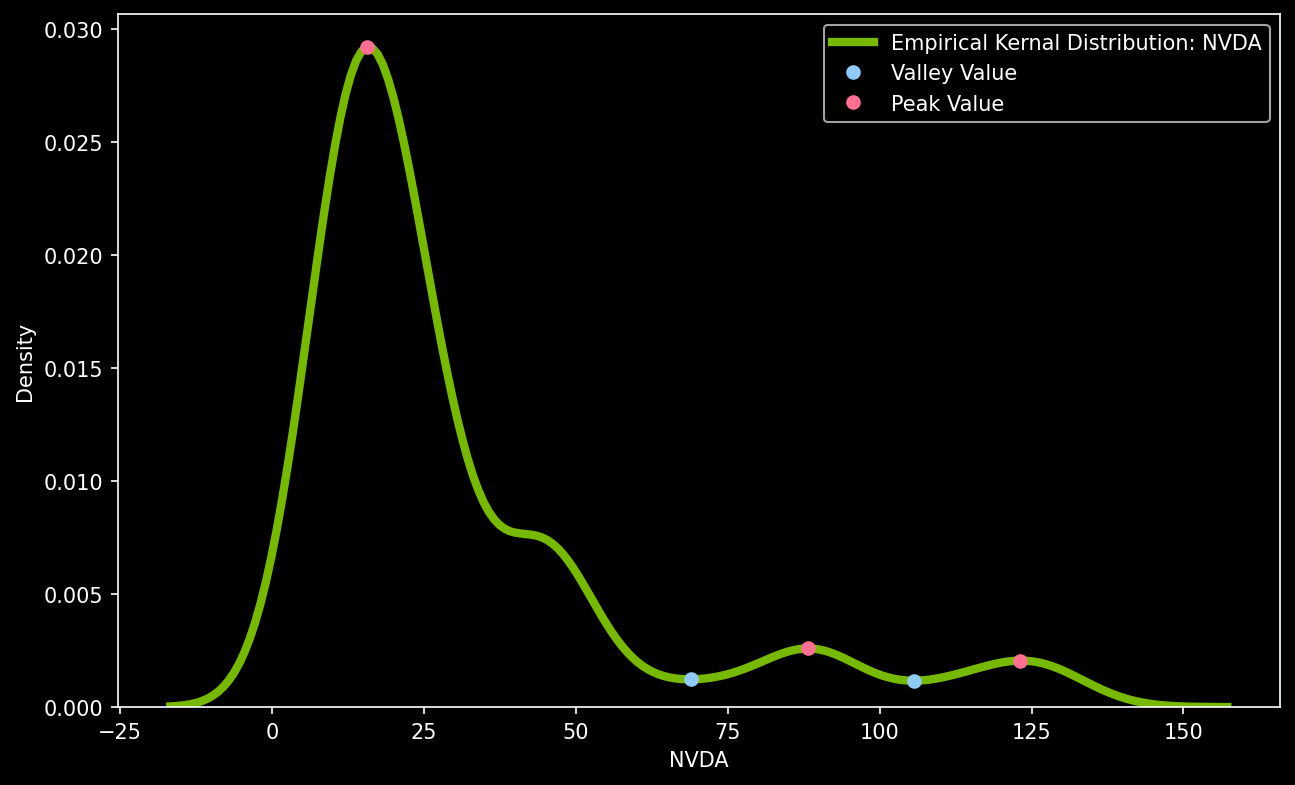

In [123]:
close_data = stocks
current_X = close_data['NVDA']
stock_symbol =  'NVDA'

# Plotting the histogram of r
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()

# Calculate the peak value
sns_kde = sns.kdeplot(data=current_X , linewidth=4)
x, y = sns_kde.get_lines()[0].get_data()

peaks, _ = find_peaks(y)
peak_x_values = x[peaks]

valleys, _ = find_peaks(-y)  # Negate y to find valleys
valleys, _ = find_peaks(-y) 

print("Peaks corresponding x values:", x[peaks])
print("Valleys corresponding x values:", x[valleys])

plt.plot(x[valleys], y[valleys], "o", label='Valleys', color = '#90CAF9')  
plt.plot(peak_x_values, y[peaks], "ro", label='Peaks', color = '#FF6F91')

ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 
           'Valley Value',
           'Peak Value'])

##### Calculate P

In [131]:
import scipy
cut_point = 68.91934158

# Calculate the total area
total_area = scipy.integrate.simps(y, x)
print("Total Area:", total_area)

# Calculate the specific area between 0 and cut_point
mask = (x >= 0) & (x <= cut_point)
area_between = scipy.integrate.simps(y[mask], x[mask])
print("Specific Area:", area_between)

# Calculate probability
p = area_between / total_area
print("Probability:", p)

NameError: name 'scipy' is not defined